In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['IdLookupTable.csv', 'test', 'SampleSubmission.csv', 'training']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [3]:
train = pd.read_csv('../input/training/training.csv')

In [4]:
test = pd.read_csv('../input/test/test.csv')

In [5]:
lookid = pd.read_csv('../input/IdLookupTable.csv')

In [6]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [7]:
train.fillna(method='ffill',inplace=True)

In [8]:
train.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
train.shape

(7049, 31)

In [10]:
imag = []
for i in range(0,7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [11]:
image_list = np.array(imag,dtype='float')
X_train = image_list.reshape(-1,96,96)

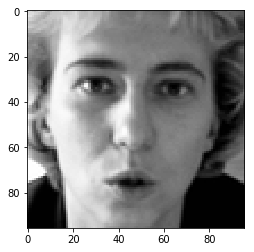

In [12]:
plt.imshow(X_train[1],cmap='gray')
plt.show()

In [13]:
training = train.drop('Image',axis=1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)

y_train = np.array(y_train,dtype='float')

In [14]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.fit(X_train,y_train,epochs=500,batch_size=128,validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 4934 samples, validate on 2115 samples
Epoch 1/500
4934/4934 [==============================] - 3s 696us/step - loss: 23473.9821 - mean_absolute_error: 98.5090 - val_loss: 2681.0828 - val_mean_absolute_error: 48.3088
Epoch 2/500
4934/4934 [==============================] - 0s 93us/step - loss: 2179.7284 - mean_absolute_error: 38.9026 - val_loss: 954.4179 - val_mean_absolute_error: 25.2920
Epoch 3/500
4934/4934 [==============================] - 0s 82us/step - loss: 785.0872 - mean_absolute_error: 21.3244 - val_loss: 298.7820 - val_mean_absolute_error: 13.4425
Epoch 4/500
4934/4934 [==============================] - 0s 79us/step - loss: 435.5882 - mean_absolute_error: 15.3208 - val_loss: 184.2255 - val_mean_absolute_error: 10.4292
Epoch 5/500
4934/4934 [==============================] - 0s 82us/step - loss: 366.4428 - mean_absolute_error: 13.6673 - val_loss: 169.3201 - val_mean_absolute_error: 9.9371
Epoch 6/500
4934/4934 [=======

In [16]:
timag = []

for i in range(0,1783):
    timg = test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [17]:
timag_list = np.array(timag,dtype='float')
X_test = timag_list.reshape(-1,96,96)

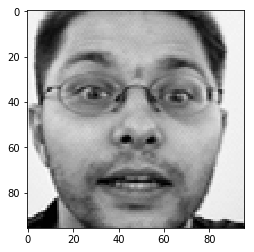

In [18]:
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [19]:
pred = model.predict(X_test)

In [20]:
lookid_list = list(lookid['FeatureName'])
imageID = list(lookid['ImageId']-1)
pre_list = list(pred)

In [21]:
rowid = lookid['RowId']
rowid = list(rowid)

In [22]:
feature = []
for f in list(lookid['FeatureName']):
    feature.append(lookid_list.index(f))

In [23]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [24]:
rowid = pd.Series(rowid,name = 'RowId')

In [25]:
loc = pd.Series(preded,name = 'Location')

In [26]:
submission = pd.concat([rowid,loc],axis = 1)

In [27]:
submission.to_csv('face_key_detection_submission.csv',index = False)